In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import missingno as msno

In [23]:
df = pd.read_csv('/content/sample_data/hotel_bookings.csv')
print("Shape:", df.shape)
display(df.head(5))

Shape: (119390, 32)


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


Basic information about the data

In [24]:
print("dtypes")
print(df.dtypes.sort_index())

print("\n .info()")
df.info()

print("\nNumeric describe")
df.describe().T

print("\nObject/Categorical describe")
df.describe().T


dtypes
adr                               float64
adults                              int64
agent                             float64
arrival_date_day_of_month           int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_year                   int64
assigned_room_type                 object
babies                              int64
booking_changes                     int64
children                          float64
company                           float64
country                            object
customer_type                      object
days_in_waiting_list                int64
deposit_type                       object
distribution_channel               object
hotel                              object
is_canceled                         int64
is_repeated_guest                   int64
lead_time                           int64
market_segment                     object
meal                               object
previous_bookings_not_cance

,count,mean,std,min,25%,50%,75%,max
is_canceled,119390.0,0.370416,0.482918,0.00,0.00,0.000,1.0,1.0
lead_time,119390.0,104.011416,106.863097,0.00,18.00,69.000,160.0,737.0
arrival_date_year,119390.0,2016.156554,0.707476,2015.00,2016.00,2016.000,2017.0,2017.0
arrival_date_week_number,119390.0,27.165173,13.605138,1.00,16.00,28.000,38.0,53.0
arrival_date_day_of_month,119390.0,15.798241,8.780829,1.00,8.00,16.000,23.0,31.0
stays_in_weekend_nights,119390.0,0.927599,0.998613,0.00,0.00,1.000,2.0,19.0
stays_in_week_nights,119390.0,2.500302,1.908286,0.00,1.00,2.000,3.0,50.0
adults,119390.0,1.856403,0.579261,0.00,2.00,2.000,2.0,55.0
children,119386.0,0.103890,0.398561,0.00,0.00,0.000,0.0,10.0
babies,119390.0,0.007949,0.097436,0.00,0.00,0.000,0.0,10.0


Top Columns with missing values

— Top Missing Columns —


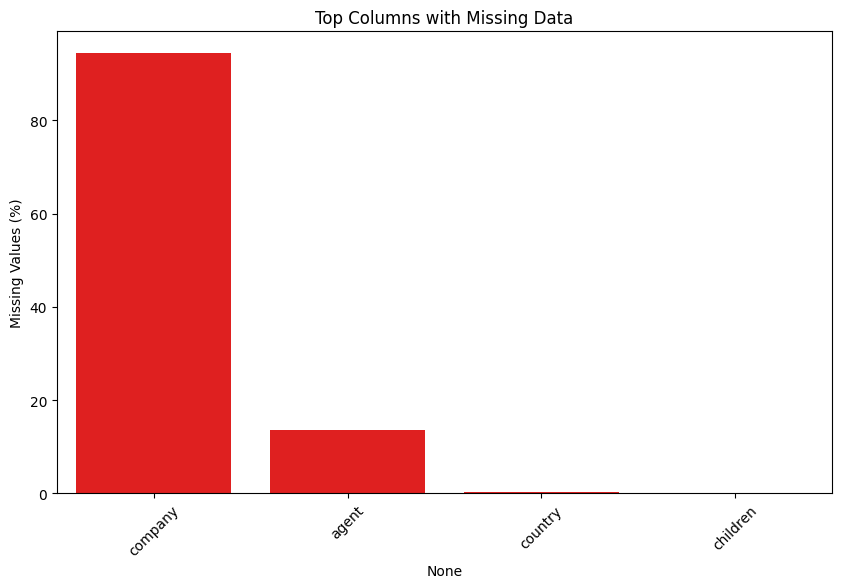

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

na_percent = df.isna().mean() * 100
na_percent = na_percent[na_percent > 0].sort_values(ascending=False)

top_missing = na_percent.head(10)

print("— Top Missing Columns —")
pd.DataFrame({"missing_count": df[top_missing.index].isna().sum(),"missing_pct": top_missing})

plt.figure(figsize=(10,6))
sns.barplot(x=top_missing.index, y=top_missing.values, color="red")
plt.xticks(rotation=45)
plt.ylabel("Missing Values (%)")
plt.title("Top Columns with Missing Data")
plt.show()


Detecting Duplicated Rows

In [26]:
dup_rows = df.duplicated().sum()
print(f"Exact duplicate rows: {dup_rows}")

if dup_rows > 0:
    display(df[df.duplicated()].head())


Exact duplicate rows: 31994


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
5,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03
22,Resort Hotel,0,72,2015,July,27,1,2,4,2,...,No Deposit,250.0,NaN,0,Transient,84.67,0,1,Check-Out,2015-07-07
43,Resort Hotel,0,70,2015,July,27,2,2,3,2,...,No Deposit,250.0,NaN,0,Transient,137.00,0,1,Check-Out,2015-07-07
138,Resort Hotel,1,5,2015,July,28,5,1,0,2,...,No Deposit,240.0,NaN,0,Transient,97.00,0,0,Canceled,2015-07-01
200,Resort Hotel,0,0,2015,July,28,7,0,1,1,...,No Deposit,240.0,NaN,0,Transient,109.80,0,3,Check-Out,2015-07-08


Outliers Detection


🔹 adr
IQR lower bound = -15.77, upper bound = 211.06
Outliers detected: 3793 (3.18% of data)


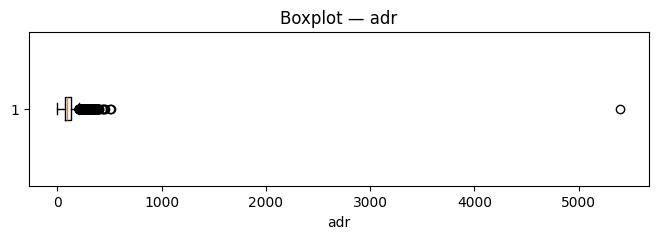

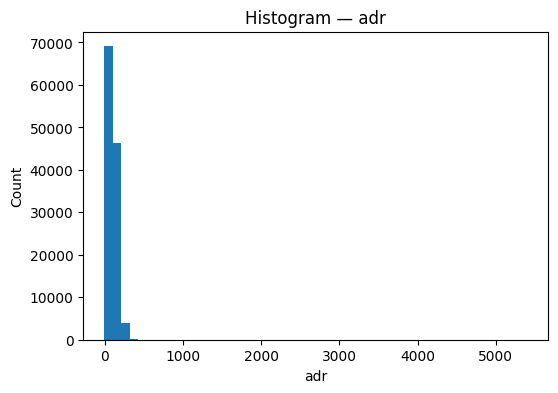


🔹 lead_time
IQR lower bound = -195.00, upper bound = 373.00
Outliers detected: 3005 (2.52% of data)


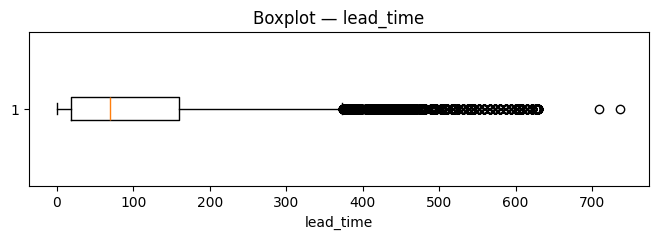

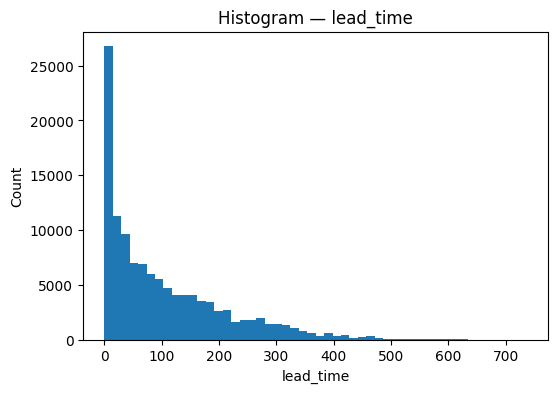

In [27]:
import matplotlib.pyplot as plt

def iqr_bounds(s, k=1.5):
    q1 = s.quantile(0.25)
    q3 = s.quantile(0.75)
    iqr = q3 - q1
    return q1 - k*iqr, q3 + k*iqr

cols_to_check = ['adr', 'lead_time']

for col in cols_to_check:
    if col in df.columns:
        s = df[col].dropna()
        lower, upper = iqr_bounds(s)
        outliers = ((s < lower) | (s > upper)).sum()
        total = s.shape[0]

        print(f"\n🔹 {col}")
        print(f"IQR lower bound = {lower:.2f}, upper bound = {upper:.2f}")
        print(f"Outliers detected: {outliers} ({outliers/total:.2%} of data)")

        # Boxplot
        plt.figure(figsize=(8,2))
        plt.boxplot(s, vert=False, showfliers=True)
        plt.title(f"Boxplot — {col}")
        plt.xlabel(col)
        plt.show()

        # Histogram
        plt.figure(figsize=(6,4))
        s.plot(kind='hist', bins=50)
        plt.title(f"Histogram — {col}")
        plt.xlabel(col)
        plt.ylabel("Count")
        plt.show()
    else:
        print(f"{col} not found in dataset.")


Cardinality for the catogircal columns

In [28]:
cat_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()

card = pd.DataFrame({
    'n_unique': [df[c].nunique(dropna=True) for c in cat_cols]
}, index=cat_cols).sort_values('n_unique', ascending=False)

print("— Categorical Cardinality —")
card


— Categorical Cardinality —


,n_unique
reservation_status_date,926
country,177
assigned_room_type,12
arrival_date_month,12
reserved_room_type,10
market_segment,8
distribution_channel,5
meal,5
customer_type,4
deposit_type,3


# Data Cleaning

Handle Missing Values

In [29]:
fill_strategies = {
    'company': 0,
    'agent': 0,
    'country': df['country'].mode()[0],
    'children': df['children'].median()
}

df = df.fillna(value=fill_strategies)

Remove Duplicates

In [30]:
df = df.drop_duplicates()

print(f"Dataset shape after cleaning: {df.shape}")


Dataset shape after cleaning: (87377, 32)


####Handle Outliers
* any value above 1000 is set to 1000
* cap lead_time at the 99th percentile

ADR capped at max: 1000.0
Lead_time capped at: 347.0


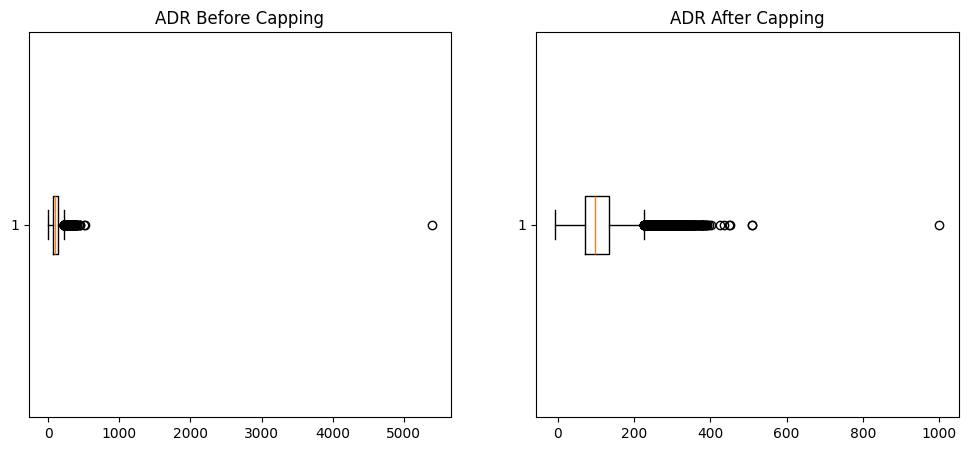

In [31]:
adr_before = df['adr'].copy()
df['adr'] = df['adr'].clip(upper=1000)

lead_time_cap = df['lead_time'].quantile(0.99)
df['lead_time'] = df['lead_time'].clip(upper=lead_time_cap)

print(f"ADR capped at max: {df['adr'].max()}")
print(f"Lead_time capped at: {lead_time_cap}")


fig, axes = plt.subplots(1, 2, figsize=(12, 5))

axes[0].boxplot(adr_before, vert=False)
axes[0].set_title("ADR Before Capping")

axes[1].boxplot(df['adr'], vert=False)
axes[1].set_title("ADR After Capping")

plt.show()


Fix Data Types
* Convert reservation_status_date to datetime
* Convert numeric columns to integer (after handling missing values)
* combine arrivale date in one column


In [32]:
df['reservation_status_date'] = pd.to_datetime(df['reservation_status_date'])

int_columns = ['children', 'company', 'agent']
for col in int_columns:
    df[col] = df[col].astype(int)

df.dtypes[['reservation_status_date', 'children', 'company', 'agent']]



,0
reservation_status_date,datetime64[ns]
children,int64
company,int64
agent,int64


In [33]:
df['arrival_date_month'] = pd.to_datetime(df['arrival_date_month'], format='%B').dt.month

df['arrival_date'] = pd.to_datetime(dict(
    year=df['arrival_date_year'],
    month=df['arrival_date_month'],
    day=df['arrival_date_day_of_month']
), errors='coerce')

df = df.drop(columns=['arrival_date_year', 'arrival_date_month', 'arrival_date_day_of_month'])

df.head()

,hotel,is_canceled,lead_time,arrival_date_week_number,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,...,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,arrival_date
0,Resort Hotel,0,342,27,0,0,2,0,0,BB,...,0,0,0,Transient,0.0,0,0,Check-Out,2015-07-01,2015-07-01
1,Resort Hotel,0,347,27,0,0,2,0,0,BB,...,0,0,0,Transient,0.0,0,0,Check-Out,2015-07-01,2015-07-01
2,Resort Hotel,0,7,27,0,1,1,0,0,BB,...,0,0,0,Transient,75.0,0,0,Check-Out,2015-07-02,2015-07-01
3,Resort Hotel,0,13,27,0,1,1,0,0,BB,...,304,0,0,Transient,75.0,0,0,Check-Out,2015-07-02,2015-07-01
4,Resort Hotel,0,14,27,0,2,2,0,0,BB,...,240,0,0,Transient,98.0,0,1,Check-Out,2015-07-03,2015-07-01


#Feature Engineering & Preprocessing

Create total_guests

In [34]:
df['total_guests'] = df['adults'] + df['children'] + df['babies']

df[['adults', 'children', 'babies', 'total_guests']].head()

,adults,children,babies,total_guests
0,2,0,0,2
1,2,0,0,2
2,1,0,0,1
3,1,0,0,1
4,2,0,0,2


Create total_nights

In [35]:
df['total_nights'] = df['stays_in_weekend_nights'] + df['stays_in_week_nights']

df[['stays_in_weekend_nights', 'stays_in_week_nights', 'total_nights']].head()

,stays_in_weekend_nights,stays_in_week_nights,total_nights
0,0,0,0
1,0,0,0
2,0,1,1
3,0,1,1
4,0,2,2


Create is_family

In [36]:
df['is_family'] = ((df['children'] + df['babies']) > 0)

df[['children', 'babies', 'is_family']].head()

,children,babies,is_family
0,0,0,False
1,0,0,False
2,0,0,False
3,0,0,False
4,0,0,False


Encoding based on cardinality threshold

In [37]:
threshold = 10

categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
encoding_map = {}

for col in categorical_cols:
    unique_vals = df[col].nunique()
    if unique_vals > threshold:
        freq = df[col].value_counts(normalize=True)
        df[col + '_encoded'] = df[col].map(freq)
        encoding_map[col] = "Frequency Encoding"
    else:
        encoding_map[col] = "One-Hot Encoding"
        df = pd.get_dummies(df, columns=[col], drop_first=True)

encoding_map

{'hotel': 'One-Hot Encoding',
 'meal': 'One-Hot Encoding',
 'country': 'Frequency Encoding',
 'market_segment': 'One-Hot Encoding',
 'distribution_channel': 'One-Hot Encoding',
 'reserved_room_type': 'One-Hot Encoding',
 'assigned_room_type': 'Frequency Encoding',
 'deposit_type': 'One-Hot Encoding',
 'customer_type': 'One-Hot Encoding',
 'reservation_status': 'One-Hot Encoding'}

In [41]:
df.drop([ 'reservation_status_date'],axis=1 , inplace= True)


Train/Test Split

In [43]:
from sklearn.model_selection import train_test_split

X = df.drop('is_canceled', axis=1)
y = df['is_canceled']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)